<a href="https://colab.research.google.com/github/VictorMercier/Track-Data-Science/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression Introduction

Linear regression looks at the relationship between the data you have and the data you want to predict.

Linear Regression is a basic and commonly used type of predictive analysis. It’s the most widely used of all statistical techniques. It quantifies the relationship between one or more predictor variables and one outcome variable.

Linear regression models are used to show (or predict) the relationship between two variables or factors. Regression analysis is commonly used to show the correlation between two variables.


In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [145]:
# J'ai importé un excel que j'ai vu dans une vidéo youtube où un mec explique comment on fait une regréssion linéaire. 
# Le excel est dans l'onglet fichier si vous voulez le voir. 
data = pd.read_excel(r"OilShell.xlsx")   
data 

,Date,Oil Closing Price,Close
0,2010-11-15,81.510002,64.599998
1,2010-11-22,83.760002,61.610001
2,2010-11-29,89.190002,63.549999
3,2010-12-06,87.790001,64.720001
4,2010-12-13,88.019997,64.419998
...,...,...,...
518,2020-10-19,39.849998,24.360001
519,2020-10-26,35.790001,24.150000
520,2020-11-02,37.139999,25.320000
521,2020-11-09,40.130001,29.389999


In [146]:
# Ici je change la colonne Index tout à gauche par les dates pour une meilleure lisibitité du tableau
data.index = pd.to_datetime(data["Date"])

# Avec la fonction .drop() je retire la colonne date du tableau vu qu'elle est en index. 
data = data.drop('Date', axis=1)
data

,Oil Closing Price,Close
Date,,
2010-11-15,81.510002,64.599998
2010-11-22,83.760002,61.610001
2010-11-29,89.190002,63.549999
2010-12-06,87.790001,64.720001
2010-12-13,88.019997,64.419998
...,...,...
2020-10-19,39.849998,24.360001
2020-10-26,35.790001,24.150000
2020-11-02,37.139999,25.320000


In [147]:
data = data.rename(columns={"Close" : "Royal Dutch Shell Closing Price"})
data 

,Oil Closing Price,Royal Dutch Shell Closing Price
Date,,
2010-11-15,81.510002,64.599998
2010-11-22,83.760002,61.610001
2010-11-29,89.190002,63.549999
2010-12-06,87.790001,64.720001
2010-12-13,88.019997,64.419998
...,...,...
2020-10-19,39.849998,24.360001
2020-10-26,35.790001,24.150000
2020-11-02,37.139999,25.320000


In [148]:
# Je vérifie s'il y a des cases vides (i.e avec des NA ou NaN), on peut retirer le display
display(data.isna().any())

# Etant donné que j'ai True, je vais les enlever avec la fonction .dropna()
data = data.dropna()
data

Oil Closing Price                  False
Royal Dutch Shell Closing Price    False
dtype: bool

,Oil Closing Price,Royal Dutch Shell Closing Price
Date,,
2010-11-15,81.510002,64.599998
2010-11-22,83.760002,61.610001
2010-11-29,89.190002,63.549999
2010-12-06,87.790001,64.720001
2010-12-13,88.019997,64.419998
...,...,...
2020-10-19,39.849998,24.360001
2020-10-26,35.790001,24.150000
2020-11-02,37.139999,25.320000


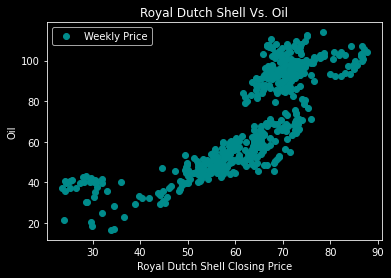

In [159]:
# Je définis mes axes x et y 
x = data["Royal Dutch Shell Closing Price"]
y = data["Oil Closing Price"]

# 1er graph simple sous forme de rond, d'où le "o" qui indique le format, "cercles". 
plt.plot(x, y, "o", color = "darkcyan", label = "Weekly Price")
plt.title("Royal Dutch Shell Vs. Oil")
plt.xlabel("Royal Dutch Shell Closing Price")
plt.ylabel("Oil")
plt.style.use('dark_background')
plt.legend()
plt.show()

In [130]:
#mesurer la corrélation
data.corr()

,Oil Closing Price,Royal Dutch Shell Closing Price
Oil Closing Price,1.000000,0.803788
Royal Dutch Shell Closing Price,0.803788,1.000000


Strong relationship as r > 0.8
*   Very strong relationship (|r|>0.8 =>)
*   Strong relationship (0.6≤|r|)
*   Moderate relationship (0.4≤|r|)
*   Weak relationship (0.2≤|r|)
*  Very weak relationship (|r|)

In [131]:
#juste avoir la description des données

data.describe()

,Oil Closing Price,Royal Dutch Shell Closing Price
count,523.000000,523.000000
mean,68.933690,62.398222
std,23.967035,12.743523
min,16.559999,23.650000
25%,48.930000,56.180000
50%,61.660000,64.919998
75%,93.384998,70.890000
max,113.930000,87.599998


75% des valeurs sont comprises entre mean - std < mean < mean + std, donc faible dispersion des valeurs

#Cheking for Outliers and Skewness

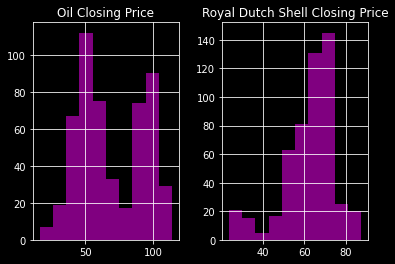

In [158]:
data.hist(grid=True, color = "purple")
plt.style.use('dark_background')

Looks like normal distribution so it seems that is not a lot of outliers. However it looks like Royal Dutch Shell seems a little bit negative skewed

#Calculate kurtosis and skewness

In [133]:
from scipy import stats
from scipy.stats import kurtosis, skew

In [134]:
#je calcule l'excès kurtosis en utilisant la méthode fisher. L'alternative c'est Pearson mais anyway. Kurtosis (with fisher) doit être proche de 0, sous Person proche de 3.
Oil_kurtosis = kurtosis(data["Oil Closing Price"], fisher= True)
royal_kurtosis = kurtosis(data["Royal Dutch Shell Closing Price"], fisher = True)

#je calcule le skewness
royal_skew = skew(data["Royal Dutch Shell Closing Price"])
Oil_skew = skew(data["Oil Closing Price"])

display('Royal Dutch Shell Kurtosis: {:2}'.format(royal_kurtosis))
display('Oil Kurtosis: {:2}'.format(oil_kurtosis))

display('Royal Dutch Shell Skew: {:2}'.format(royal_skew))
display('Oil Skew: {:2}'.format(oil_skew))

'Royal Dutch Shell Kurtosis: 1.2251095754809818'

'Oil Kurtosis: -1.3277406324528571'

'Royal Dutch Shell Skew: -1.0449023389186745'

'Oil Skew: 0.14989836772596657'

Explication à faire

Skewness represents the concentration of values below or above the average. 
Kurtosis makes it possible to realize the importance of extreme values.

Excess kurtosis compares the kurtosis coefficient with that of a normal distribution. In other words, it measures the tailedness and peakedness compared to a normal distribution. The bigger the tail the larger the excess of kurtosis, or outliers.
Here we can see that both Royal Dutch Shell Kurtosis and and Oil Kurtosis have kurtosis smaller than 3. It means that the distributions have lighter tails than the normal distribution. In other words there are not a lot of extreme values.

Concerning the skewness of Royal Dutch Shell, it is a bit negatively skewed which means that quite of the values are below the mean.

On the whole, there is not extreme value


#Kurtosis


* Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distribution 

* Any distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader. --> more flat-topped distributions

* Any distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper. --> less flat-topped distributions

#Skewness

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.

#Building the slope

1.5117023702368424
-25.39384967676686


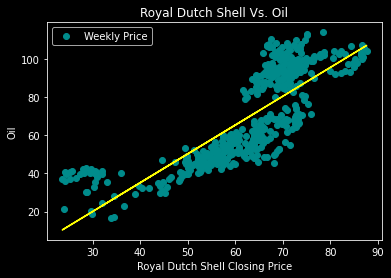

In [160]:
plt.plot(x, y, 'o', color = "darkcyan", label = "Weekly Price")
a, b = np.polyfit(x, y, 1) #facteur de la slope, b the intercept so that we get the folowwing equation y =ax + b 
print(a)
print(b)
plt.title("Royal Dutch Shell Vs. Oil")
plt.xlabel("Royal Dutch Shell Closing Price")
plt.ylabel("Oil")
plt.style.use('dark_background')
plt.legend()
plt.plot(x, a*x + b, color = "yellow")

About the np.polyfit: 
It is a pretty general least squares polynomial fit function which accepts the data set and a polynomial function of any degree (specified by the user), and returns a vector of coefficients p that minimises the squared error.

The np.polyfit() function is an easy way to perfom a polynomial function as mentioned before. 
However, what we want to be able to do with our linear regression model is to be able to predict future values. In fact, we want to see here if exxon's stock price is correlated to the oil stock price. 
In other word, if the oil stock price increases, does the exxon stock price increases too ? 

In [ ]:
# As we  want to see if the stock price of exxon is correlated to the oil stock price 
# We will then have X (input) equal to oil price and Y (the output) equal to the exxon stock price
X = data[["oil_price"]]
y = data.drop("oil_price", axis=1)

print(X)
print(y)

            oil_price
date                 
2014-03-28     106.64
2014-03-31     105.95
2014-04-01     105.70
2014-04-02     103.37
2014-04-03     104.88
...               ...
2019-03-19      67.13
2019-03-20      68.35
2019-03-21      68.30
2019-03-22      66.29
2019-03-25      67.37

[1248 rows x 1 columns]
            exxon_price
date                   
2014-03-28    97.699997
2014-03-31    97.680000
2014-04-01    97.730003
2014-04-02    97.949997
2014-04-03    97.930000
...                 ...
2019-03-19    80.870003
2019-03-20    81.320000
2019-03-21    81.790001
2019-03-22    80.480003
2019-03-25    79.919998

[1248 rows x 1 columns]


In [ ]:
# Split the data to train them and then test them
# The train size will represent 80% of our data and the test will
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Now that we have our X and y, we have to create a model and fit it. 
model = LinearRegression()
model.fit(X_train, y_train)

# Now that we have our regression model, we can make some predictions: 
y_predict = model.predict(X_test)

# An example of the first 4 predictions:
y_predict[:4]

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ]])

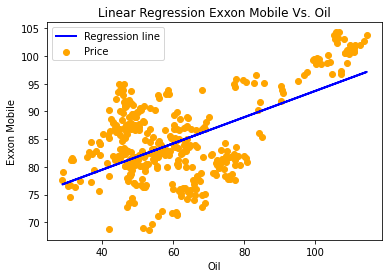

In [ ]:
# Let's built our model 
plt.scatter(X_test, y_test, color = "orange", label ="Price")
plt.plot(X_test, y_predict, color = "blue", linewidth = 2, label = "Regression line")

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()


Now that we have seen the linear regression with one variable, let's try with multiple variables. 

# Multiple Regression 


NameError: ignored